<img src="https://raw.githubusercontent.com/israeldi/quantlab/master/assets/images/Program-Logo.png" width="400px" align="right">

# QuantLab: Stochastics
### [(Go to Quant Lab)](https://israeldi.github.io/quantlab/)

#### Source: Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="200px" align="left">

## Table of Contents

1. [Random Numbers](#1.-Random-Numbers)
2. [Plotting Random Samples](#2.-Plotting-Random-Samples)
3. [Simulation](#3.-Simulation)
    - 3.1 [Random Variables](#3.1-Random-Variables)
    - 3.2 [Stochastic Processes](#3.2-Stochastic-Processes)
        - 3.2.1 [Geometric Brownian Motion](#3.2.1-Geometric-Brownian-Motion)
4. [Valuation](#4.-Valuation)
    - 4.1 [Valuation of European call options in Black-Scholes-Merton model](#4.1-Valuation-of-European-call-options-in-Black-Scholes-Merton-model)
    - 4.2 [Vega function and implied volatility estimation](#4.2-Vega-function-and-implied-volatility-estimation)
    - 4.3 [Pricing European Options by Monte Carlo](#4.3-Pricing-European-Options-by-Monte-Carlo)
    - 4.4 [American Options](#4.4-American-Options)

Initially import all the modules we will be using for our notebook

In [2]:
import math
import numpy as np
import numpy.random as npr 

# COMMAND PROMPT: pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
plt.style.use('seaborn')

In [4]:
# Directory where we will save our plots
directory = "./images"
if not os.path.exists(directory):
    os.makedirs(directory)

## 1. Random Numbers
#### ([Back to Top](#Table-of-Contents))

First we set the `seed` in order to always generate the same random numbers.

In [5]:
npr.seed(100)
np.set_printoptions(precision=4)

**1.1** Generates $X_1,\ldots\,X_n$ where $X_i \sim U[0,1]$. In this case $n = 10$

In [6]:
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

**1.2** Generates $2$-dimensional $(X,Y)$, where $X_i$ and $Y_j \sim U[0,1]$ 

In [7]:
npr.rand(5, 5)

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

**1.3** Generates $1$-dimensional $X_1,\ldots\,X_n$ where $X_i \sim U[a,b]$. In other words, we are scaling $U_i \sim U[0,1]$ and adding a drift term, $X_i = a + U_i*(b-a)$

In [8]:
a = 5.
b = 10.
npr.rand(10) * (b - a) + a

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

**1.4** Same transformation as in **1.3)** but in $2$ dimensions

In [9]:
npr.rand(5, 5) * (b - a) + a

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

## 2. Plotting Random Samples
#### ([Back to Top](#Table-of-Contents))

**2.1)** First we can compute a couple random samples using random number generators

In [12]:
sample_size = 10000

# Uniformaly distribibuted sample with 3 observations each
rn1 = npr.rand(sample_size, 3)

# Sampling 500 integers between 0-9 (10 is not included)
rn2 = npr.randint(0, 10, sample_size)

# Sampling 500 random floats from [0, 1]
rn3 = npr.sample(size = sample_size)

# Randomly sample values from vector a 
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size = sample_size)

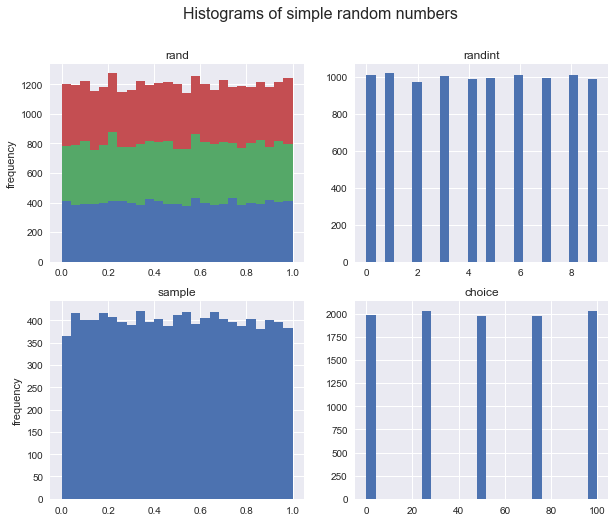

In [13]:
# Create 2x2 subplots of each of our random number generators
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')

ax2.hist(rn2, bins=25)
ax2.set_title('randint')

ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')

ax4.hist(rn4, bins=25)
ax4.set_title('choice');

fig.suptitle('Histograms of simple random numbers', fontsize=16)
plt.savefig('./images/stoch_01.png');

**2.2)** We can also generate randoom numbers from distributions

In [14]:
sample_size = 500

# Generate random samples from standard normal
rn1 = npr.standard_normal(sample_size)

# Generate random samples from normal
rn2 = npr.normal(loc= 100, scale=20, size = sample_size)

# Generate random samples from chisquare
rn3 = npr.chisquare(df= 2, size = sample_size)

# Generate random samples from poisson
rn4 = npr.poisson(lam= 1, size = sample_size)

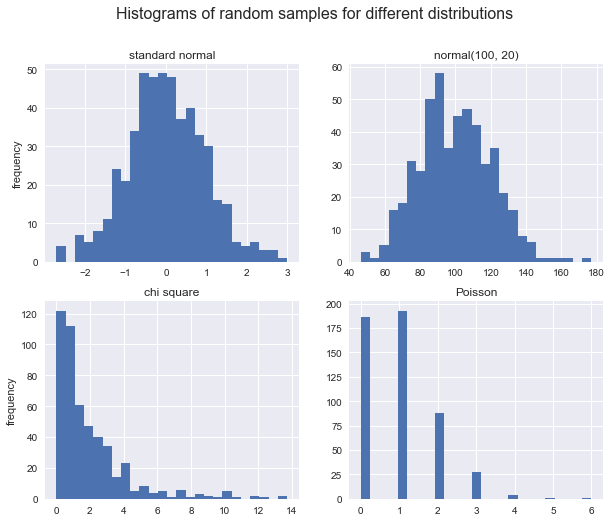

In [15]:
# Create 2x2 subplots of each of our random number generators
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')

ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')

ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')

ax4.hist(rn4, bins=25)
ax4.set_title('Poisson');

fig.suptitle('Histograms of random samples for different distributions', fontsize=16)
plt.savefig('./images/stoch_02.png');

## 3. Simulation
#### ([Back to Top](#Table-of-Contents))

### 3.1 Random Variables

**3.1.1)** Consider, for example, the Black-Scholes-Merton setup for option pricing. In their setup, the level of a
stock index $S_T$ at a future date $T$ given a level $S_0$ as of today is given according to:

$$S_{T}=S_{0}exp\{(r-\frac{1}{2}\sigma^{2})T+\sigma\sqrt{T}z\}$$

where,

- $S_T$ is the index level at date $T$
- $r$ constant riskless short rate
- $\sigma$ constant volatility (standard deviation of returns of $S$)
- $z$ standard normal random variable

In [16]:
S0 = 100  
r = 0.05  
sigma = 0.25  
T = 2.0  
I = 10000

ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * npr.standard_normal(I))

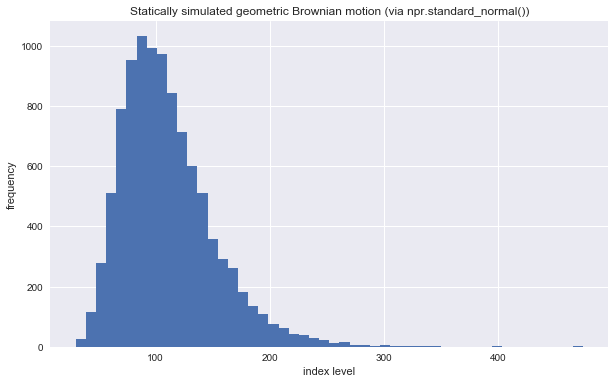

In [17]:
# Simulation of Geometric Brownian Motion
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.title('Statically simulated geometric Brownian motion (via npr.standard_normal())')
plt.xlabel('index level')
plt.ylabel('frequency');
plt.savefig('./images/stoch_03.png');

**3.1.2)** Alternatively since we know that the equation in **3.1.1)** represents a log-normal distribution, we can use the `numpy`'s lognormal random generator by specifying location and scale parameters.

Recall by definition of log-normal, 
\begin{align*}
\mu & =(r-\frac{1}{2}\sigma^{2})T\\
\sigma & =\sigma\sqrt{T}
\end{align*}

In [19]:
ST2 = S0 * npr.lognormal(mean = (r - 0.5 * sigma ** 2) * T, sigma = sigma * math.sqrt(T), size= I)

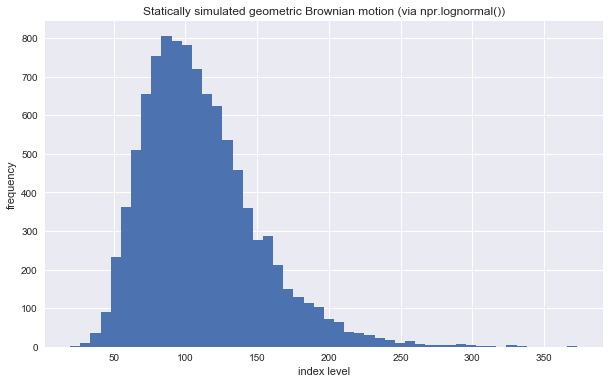

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.title('Statically simulated geometric Brownian motion (via npr.lognormal())')
plt.xlabel('index level')
plt.ylabel('frequency');
plt.savefig('./images/stoch_04.png');

**3.1.3)** In order to conclude that the two simulations above are indeed the same, we can compute some statistics on the two distributions and compare them.

In [21]:
import scipy.stats as scs

In [22]:
def print_statistics(a1, a2):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    a1, a2: ndarray objects
        results objects from simulation
    '''
    sta1 = scs.describe(a1)  
    sta2 = scs.describe(a2)  
    print('%14s %14s %14s' % 
        ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

In [20]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         32.327         28.230
           max        414.825        409.110
          mean        110.730        110.431
           std         40.300         39.878
          skew          1.122          1.115
      kurtosis          2.438          2.217


### 3.2 Stochastic Processes
#### ([Back to Top](#Table-of-Contents))

#### 3.2.1 Geometric Brownian Motion

Below we have the Stochastic differential equation in Black-Scholes-Merton:

$$dS_{t}=rS_{t}dt+\sigma S_{t}dZ_{t},$$
which can be discretized exactly by an Euler scheme,
$$S_{t}=S_{t-\Delta t}exp\{(r-\frac{1}{2}\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}z_{t}\}$$
Thus translating into python,

In [23]:
S0 = 100      # initial value
I = 10000     # number of paths to simulate
sigma = 0.25  
M = 50        # number of time intervals
dt = T / M    # length of time interval in fractions of a year
S = np.zeros(shape= (M + 1, I))  # 2-dim array to store index levels
S[0] = S0     # initializing first row of array with initial value when t = 0

# The for loop provides 10,000 different paths for each time step depending
# on the previous time step. Note this is done in a vectorized way
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
            sigma * math.sqrt(dt) * npr.standard_normal(I))  

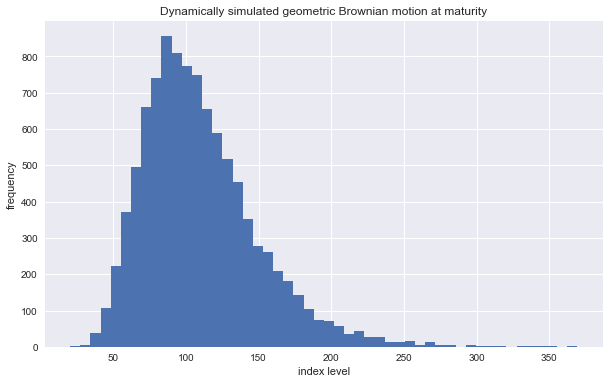

In [24]:
# The last array of array S represents all simulated values for S_T
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.title('Dynamically simulated geometric Brownian motion at maturity')
plt.xlabel('index level')
plt.ylabel('frequency');
plt.savefig('./images/stoch_05.png');

Following is a comparison of the statistics resulting from the dynamic simulation as well as from the static
simulation.

In [25]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         20.265         19.718
           max        369.431        373.244
          mean        109.811        110.696
           std         39.750         40.142
          skew          1.146          1.095
      kurtosis          2.353          2.120


Also the figure below shows the first 10 simulated paths:

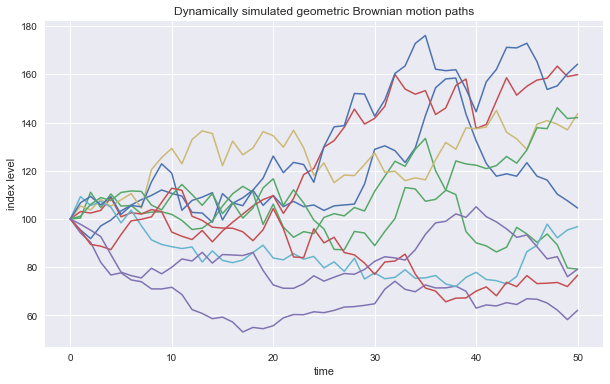

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.title('Dynamically simulated geometric Brownian motion paths')
plt.xlabel('time')
plt.ylabel('index level');
plt.savefig('./images/stoch_06.png');

Using the dynamic simulation approach not only allows us to visualize paths as displayed in the figure above,
but also to value options with **American/Bermudan** exercise or options whose payoff is path-dependent.

## 4. Valuation
#### ([Back to Top](#Table-of-Contents))

### 4.1 Valuation of European call options in Black-Scholes-Merton model 

In [27]:
def bsm_call_value(S0, K, T, r, sigma):
    ''' Valuation of European call option in BSM model.
    Analytical formula.

    Parameters
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        maturity date (in year fractions)
    r: float
        constant risk-free short rate
    sigma: float
        volatility factor in diffusion term

    Returns
    =======
    value: float
        present value of the European call option
    '''
    from math import log, sqrt, exp
    from scipy import stats

    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = (log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    # stats.norm.cdf --> cumulative distribution function
    #                    for normal distribution
    value = (S0 * stats.norm.cdf(d1, 0.0, 1.0) -
             K * exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0))
    return value

### 4.2 Vega function and implied volatility estimation

In [26]:
def bsm_vega(S0, K, T, r, sigma):
    ''' Vega of European option in BSM model.

    Parameters
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        maturity date (in year fractions)
    r: float
        constant risk-free short rate
    sigma: float
        volatility factor in diffusion term

    Returns
    =======
    vega: float
        partial derivative of BSM formula with respect
        to sigma, i.e. Vega

    '''
    from math import log, sqrt
    from scipy import stats

    S0 = float(S0)
    d1 = (log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    vega = S0 * stats.norm.pdf(d1, 0.0, 1.0) * sqrt(T)
    return vega

def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it=100):
    ''' Implied volatility of European call option in BSM model.

    Parameters
    ==========
    S0: float
        initial stock/index level
    K: float
        strike price
    T: float
        maturity date (in year fractions)
    r: float
        constant risk-free short rate
    sigma_est: float
        estimate of impl. volatility
    it: integer
        number of iterations

    Returns
    =======
    simga_est: float
        numerically estimated implied volatility
    '''
    for i in range(it):
        sigma_est -= ((bsm_call_value(S0, K, T, r, sigma_est) - C0) /
                      bsm_vega(S0, K, T, r, sigma_est))
    return sigma_est

### 4.3 Pricing European Options by Monte Carlo

The payoff of a European call option on an index at maturity is given by $h(S_T)\equiv max\{S_T-K, 0\}$, where $S_T$ is the index level at maturity date $T$ and $K$ is the strike price. Given a risk-neutral measure for the relevant stochastic process (e.g., geometric Brownian motion), the price of such an option is given by the formula:

$$C_{0}=e^{-rT}\mathbb{E}_{0}^{Q}[h(S_{T})]=e^{-rT}\intop_{0}^{\infty}h(s)q(s)ds$$

The equation below provides the respective Monte Carlo estimator for the European option, where $\tilde{S}_{T}^{i}$ is the $T$-th simulated index level at maturity.

$$\tilde{C}_{0}=e^{-rT}\frac{1}{I}\sum_{i=1}^{I}h(\tilde{S}_{T}^{i})$$

Consider the following parameterization for the geometric Brownian motion and the valuation function `gbm_mcs_stat()`, taking as a parameter only the strike price. Here, only the index level at maturity is simulated. As a reference, consider the case with a strike price of $K = 105$:

In [30]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simulation.
    
    Parameters
    ==========
    M: int
        number of time intervals for discretization
    I: int
        number of paths to be simulated
    anti_paths: boolean
        use of antithetic variates
    mo_math: boolean
        use of moment matching
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

In [31]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

In [32]:
def gbm_mcs_stat(K):
    ''' Valuation of European call option in Black-Scholes-Merton
    by Monte Carlo simulation (of index level at maturity)
    
    Parameters
    ==========
    K: float
        (positive) strike price of the option
    
    Returns
    =======
    C0: float
        estimated present value of European call option
    '''
    sn = gen_sn(1, I)
    # simulate index level at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
                 + sigma * math.sqrt(T) * sn[1])
    # calculate payoff at maturity
    hT = np.maximum(ST - K, 0)
    # calculate MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0

In [33]:
# The Monte Carlo estimator value for the European call option.
gbm_mcs_stat(K=105.)

10.010189184997577

Next, consider the dynamic simulation approach and allow for European put options in addition to the call option. The function `gbm_mcs_dyna()` implements the algorithm. The code also compares option price estimates for a call and a put stroke at the same level:

In [34]:
# The number of time intervals for the discretization.
M = 50

In [35]:
def gbm_mcs_dyna(K, option='call'):
    ''' Valuation of European options in Black-Scholes-Merton
    by Monte Carlo simulation (of index level paths)
    
    Parameters
    ==========
    K: float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0: float
        estimated present value of European call option
    '''
    dt = T / M
    
    # simulation of index level paths
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * math.sqrt(dt) * sn[t])
    
    # case-based calculation of payoff
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        # Put option
        hT = np.maximum(K - S[-1], 0)
    # calculation of MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0

In [36]:
# The Monte Carlo estimator value for the European call option (Dynamic Simulation Approach)
gbm_mcs_dyna(K=110., option='call')  

7.987266071170579

In [37]:
# The Monte Carlo estimator value for the European put option (Dynamic Simulation Approach)
gbm_mcs_dyna(K=110., option='put')  

12.623515262341943

The question is how well these simulation-based valuation approaches perform relative to the benchmark value from the Black-Scholes-Merton valuation formula. To find out, the following code generates respective option values/estimates for a range of strike prices, using the analytical option pricing formula for European calls. First, we compare the results from the static simulation approach with precise analytical values:

In [38]:
# Instantiates empty list objects to collect the results.
stat_res = []  
dyna_res = []  
anal_res = []

# Creates an ndarray object containing the range of strike prices.
k_list = np.arange(80., 120.1, 5.)  
np.random.seed(100)

In [39]:
# Simulates/calculates and collects the option values for all strike prices.
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))  
    dyna_res.append(gbm_mcs_dyna(K))  
    anal_res.append(bsm_call_value(S0, K, T, r, sigma))  

In [40]:
# Transforms the list objects to ndarray objects.
stat_res = np.array(stat_res)  
dyna_res = np.array(dyna_res)  
anal_res = np.array(anal_res)

The figure below shows the results. All valuation differences are smaller than 1% absolutely. There are both negative and positive value differences:

<Figure size 720x432 with 0 Axes>

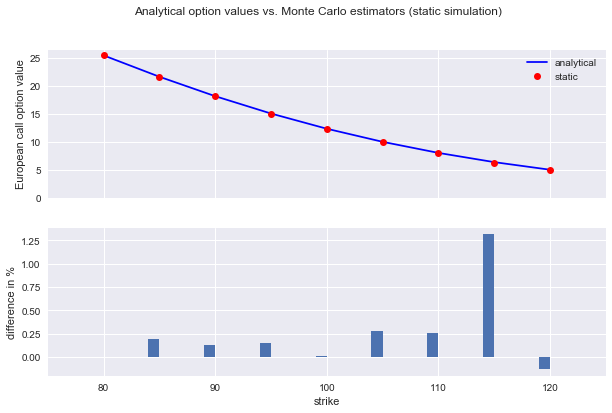

In [41]:
plt.figure(figsize=(10, 6))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, stat_res, 'ro', label='static')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125);
fig.suptitle('Analytical option values vs. Monte Carlo estimators (static simulation)')
plt.savefig('./images/stoch_15.png');

A similar picture emerges for the dynamic simulation and valuation approach, whose results are reported in the figure below. Again, all valuation differences are smaller than 1% absolutely, with both positive and negative deviations. As a general rule, the quality of the Monte Carlo estimator can be controlled for by adjusting the number of time intervals $M$ used and/or the number of paths $I$ simulated:

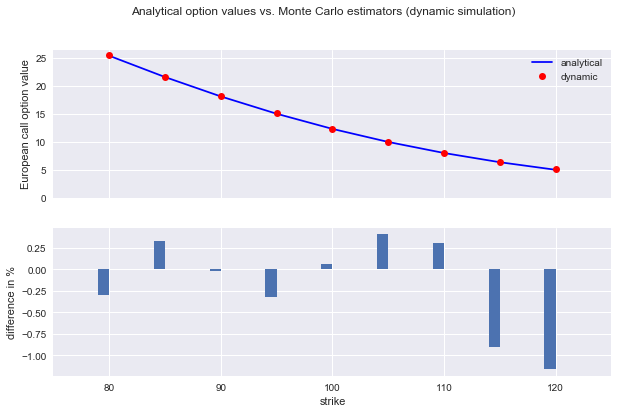

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125);
fig.suptitle('Analytical option values vs. Monte Carlo estimators (dynamic simulation)')
plt.savefig('./images/stoch_16.png');

### 4.4 American Options
#### ([Back to Top](#Table-of-Contents))

The valuation of American options is more involved compared to European options. In this case, an **optimal
stopping** problem has to be solved to come up with a fair value of the option. The Equation below formulates the
valuation of an American option as such a problem. The problem formulation is already based on a discrete
time grid for use with numerical simulation. In a sense, it is therefore more correct to speak of an option
value given **Bermudan** exercise. For the time interval converging to zero length, the value of the Bermudan
option converges to the one of the American option.

$$V_{0}=\sup_{\tau\in\{0,\Delta t,2\Delta t,\dots,T\}}e^{-rT}\mathbb{E}_{0}^{Q}[h_{\tau}(S_{\tau})]$$

The algorithm described in the following is called **Least-Squares Monte Carlo** (LSM) and is from the paper by Longstaff and Schwartz (2001). It can be shown that the value of an American (Bermudan) option at any given date $t$ is given as 

$$V_t(s)=max\{h_t(s),C_t(s)\}$$, where 

$$C_{t}(s)=\mathbb{E}_{t}^{Q}[e^{-r\Delta t}V_{t+\Delta t}(S_{t+\Delta t})|S_{t}=s]$$ 

is the so-called **continuation value** of the option given an index level of $S_t=s$ 

Consider now that we have simulated $I$ paths of the index level over $M$ time intervals of equal size $\Delta t$.

Define $Y_{t,i}\equiv e^{-r\Delta t}V_{t+\Delta t,i}$ to be the simulated continuation value for path $i$ at time $t$. We cannot use this number directly because it would imply perfect foresight. However, we can use the cross section of all such simulated continuation values to estimate the (expected) continuation value by least-squares regression. 

Given a set of basis functions $b_d,d=1,\dots,D$, the continuation value is then given by the regression estimate $\hat{C}_{t,i}=\sum_{d=1}^{D}\alpha_{d,t}^{*}\cdot b_{d}(S_{t,i})$, where the optimal regression parameters $\alpha^*$ are the solution of the least-squares problem stated in the equation below:

$$\min_{\alpha_{1,t},\dots,\alpha_{D,t}}\frac{1}{I}\sum_{i=1}^{I}(Y_{t,i}-\sum_{d=1}^{D}\alpha_{d,t}\cdot b_{d}(S_{t,i}))^{2}$$

In [40]:
# The function gbm_mcs_amer() implements the LSM algorithm for both American call and put options
def gbm_mcs_amer(K, option='call'):
    ''' Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simulation by LSM algorithm
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    dt = T / M
    df = math.exp(-r * dt)
    # simulation of index levels
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * math.sqrt(dt) * sn[t])
    # case based calculation of payoff
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)
    # LSM algorithm
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    # MCS estimator
    C0 = df * np.mean(V[1])
    return C0

In [41]:
gbm_mcs_amer(110., option='call')

7.721705606305352

In [42]:
gbm_mcs_amer(110., option='put')

13.609997625418051

The European value of an option represents a lower bound to the American option’s value. The difference is generally called the **early exercise premium**. What follows compares European and American option values for the same range of strikes as before to estimate the early exercise premium, this time with puts:

In [43]:
euro_res = []
amer_res = []

In [44]:
k_list = np.arange(80., 120.1, 5.)

In [45]:
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put'))
    amer_res.append(gbm_mcs_amer(K, 'put'))

In [46]:
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

The figure below shows that for the range of strikes chosen the early exercise premium can rise to up to 10%:

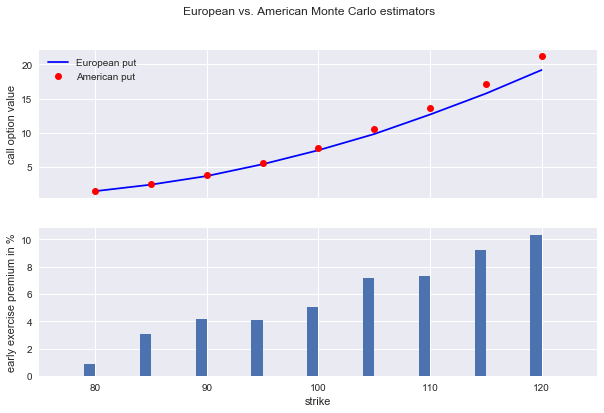

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('call option value')
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125);
fig.suptitle('European vs. American Monte Carlo estimators')
plt.savefig('./images/stoch_17.png');